In [1]:
pip install kaggle

To use the Kaggle API, you need to authenticate. Follow these steps:

1.  Go to your Kaggle account page: [https://www.kaggle.com/me/account](https://www.kaggle.com/me/account)
2.  Scroll down to the 'API' section.
3.  Click on 'Create New API Token'. This will download a `kaggle.json` file to your computer.
4.  Upload this `kaggle.json` file to your Google Colab environment. You can do this by clicking the 'Files' icon on the left sidebar (folder icon), then clicking 'Upload to session storage' (page icon with an arrow pointing up). Make sure to upload it to the root directory, or to `~/.kaggle/` if you prefer to set up the environment manually.

Alternatively, you can manually create the `~/.kaggle` directory and move the file there:

```python
import os

# Create a directory for Kaggle credentials
!mkdir -p ~/.kaggle

# Upload the kaggle.json file
# This will open a file upload dialog. Select the kaggle.json file you downloaded.
# Note: This file will be deleted when the runtime is recycled.
from google.colab import files
files.upload()

# Move the uploaded kaggle.json to the correct directory
!mv kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle API token uploaded and configured.")
```

**Note:** If you choose the manual upload method (`files.upload()`), you'll need to run that cell and upload the `kaggle.json` file.

In [2]:
import os

# Create a directory for Kaggle credentials
!mkdir -p ~/.kaggle

# Upload the kaggle.json file
# This will open a file upload dialog. Select the kaggle.json file you downloaded.
# Note: This file will be deleted when the runtime is recycled.
from google.colab import files
files.upload()

# Move the uploaded kaggle.json to the correct directory
!mv kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json


KeyboardInterrupt: 

In [ ]:
# After uploading kaggle.json, you can verify it's correctly set up.
# List available datasets (this should work if authentication is successful)
!kaggle datasets list

# Now, let's say you want to download a specific dataset. Replace 'user/dataset-name' with the actual dataset you want.
# For example, to download the 'Sentiment140' dataset:
# !kaggle datasets download -d kazanova/sentiment140 -p /content/kaggle_data

# Create a directory to store the downloaded data
import os
data_dir = './kaggle_data'
os.makedirs(data_dir, exist_ok=True)
print(f"Directory '{data_dir}' created.")

# Example: Download the Sentiment140 dataset
# !kaggle datasets download -d kazanova/sentiment140 -p {data_dir}

# You can then unzip the downloaded file if it's a .zip archive
# import zipfile
# with zipfile.ZipFile(os.path.join(data_dir, 'sentiment140.zip'), 'r') as zip_ref:
#     zip_ref.extractall(data_dir)
# print("Dataset unzipped.")

# If you tell me which dataset you're interested in, I can help you with the exact command to download it.

ref                                                                title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
saidaminsaidaxmadov/chocolate-sales                                Chocolate Sales                                         468320  2026-01-04 14:23:35.490000              0        138  1.0              
zahranusratt/student-social-media-addiction-analysis-dataset       Student Social Media Addiction Analysis Dataset           7851  2026-01-22 04:02:08.347000              0         35  1.0              
rockyt07/social-media-user-analysis                                Social Media User Analysis                           247842357  2026-01-14 02:28:41.970000              0        126  1.0

In [ ]:
# Replace 'username/dataset-name' with the actual dataset you want to download.
# For example, if you want to download 'Sentiment140' by 'kazanova', it would be 'kazanova/sentiment140'

# Define the dataset identifier
dataset_identifier = "vedtnt/newvedant" # <<< REPLACE THIS WITH YOUR DESIRED DATASET ID

# Create a directory to store the downloaded data (if not already created)
import os
data_dir = './kaggle_data'
os.makedirs(data_dir, exist_ok=True)
print(f"Directory '{data_dir}' ensured to exist.")

# Download the dataset
# The -p flag specifies the path where the dataset will be downloaded
!kaggle datasets download -d {dataset_identifier} -p {data_dir}

print(f"Attempted to download dataset '{dataset_identifier}' to '{data_dir}'")
print("Please check the output for download status and any potential errors.")

# If the downloaded file is a .zip archive, you might want to unzip it:
import zipfile
import os

# A more robust way to find the downloaded zip file:
downloaded_files = os.listdir(data_dir)
zip_files = [f for f in downloaded_files if f.endswith('.zip')]

if zip_files:
    zip_path = os.path.join(data_dir, zip_files[0]) # Assuming only one zip file is downloaded per command
    print(f"Unzipping '{zip_path}'...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_dir)
    print("Dataset unzipped.")
    # Optionally remove the zip file after extraction
    # os.remove(zip_path)
else:
    print("No zip file found to unzip in the download directory.")

Directory './kaggle_data' ensured to exist.
Dataset URL: https://www.kaggle.com/datasets/vedtnt/newvedant
License(s): unknown
  0% 0.00/69.3M [00:00<?, ?B/s]
100% 69.3M/69.3M [00:00<00:00, 2.06GB/s]
Attempted to download dataset 'vedtnt/newvedant' to './kaggle_data'
Please check the output for download status and any potential errors.
Unzipping './kaggle_data/newvedant.zip'...
Dataset unzipped.


In [ ]:
!rm /content/kaggle_data/newvedant.zip

In [ ]:
import pandas as pd
import glob
import os

# Set the directory where the Kaggle data was unzipped
parquet_dir = './kaggle_data/'


# Check if the directory exists
if os.path.exists(parquet_dir):
    print(f"Directory exists: {parquet_dir}")

    # List files in the directory
    files_in_dir = os.listdir(parquet_dir)
    print(f"Files in directory: {files_in_dir}")

    # Find parquet files, searching in subdirectories if none are found directly
    parquet_files = glob.glob(os.path.join(parquet_dir, "*.parquet"))
    if not parquet_files:
        parquet_files = glob.glob(os.path.join(parquet_dir, "**", "*.parquet"), recursive=True)
        if parquet_files:
            print("No parquet files found directly in the main directory, searching subdirectories...")

    print(f"Found {len(parquet_files)} parquet files:")
    for file in parquet_files:
        print(f"  - {os.path.basename(file)}")

    # Read all parquet files and combine them
    dfs = []
    for file in parquet_files:
        try:
            df_temp = pd.read_parquet(file)
            dfs.append(df_temp)
            print(f"Successfully read: {os.path.basename(file)} ({len(df_temp)} rows)")
        except Exception as e:
            print(f"Error reading {os.path.basename(file)}: {e}")

    # Combine all DataFrames
    if dfs:
        combined_df = pd.concat(dfs, ignore_index=True)

        print(f"\nCombined DataFrame info:")
        print(f"Total rows: {len(combined_df)}")
        print(f"Number of columns: {len(combined_df.columns)}")
        print(f"Column names: {combined_df.columns.tolist()}")

        # Display first few rows
        print("\nFirst 5 rows of combined data:")
        display(combined_df.head())

        # Display basic info
        print("\nDataFrame info:")
        combined_df.info()

    else:
        print("No DataFrames were successfully read.")

else:
    print(f"Directory does not exist: {parquet_dir}")

Directory exists: ./kaggle_data/
Files in directory: ['part-00000-905812c0-477d-4870-9960-37ee2b0beacf-c000.snappy.parquet', 'bert_embeddings.pkl', 'part-00002-905812c0-477d-4870-9960-37ee2b0beacf-c000.snappy.parquet', 'part-00003-905812c0-477d-4870-9960-37ee2b0beacf-c000.snappy.parquet', 'part-00001-905812c0-477d-4870-9960-37ee2b0beacf-c000.snappy.parquet']
Found 4 parquet files:
  - part-00000-905812c0-477d-4870-9960-37ee2b0beacf-c000.snappy.parquet
  - part-00002-905812c0-477d-4870-9960-37ee2b0beacf-c000.snappy.parquet
  - part-00003-905812c0-477d-4870-9960-37ee2b0beacf-c000.snappy.parquet
  - part-00001-905812c0-477d-4870-9960-37ee2b0beacf-c000.snappy.parquet
Successfully read: part-00000-905812c0-477d-4870-9960-37ee2b0beacf-c000.snappy.parquet (142113 rows)
Successfully read: part-00002-905812c0-477d-4870-9960-37ee2b0beacf-c000.snappy.parquet (142113 rows)
Successfully read: part-00003-905812c0-477d-4870-9960-37ee2b0beacf-c000.snappy.parquet (142115 rows)
Successfully read: part-0

,clean_summary,lemma_summary,clean_text,lemma_text,score
0,love this,love,this was such a delicious tasting drink i po...,delicious taste drink pour cup ice drink ri...,5.0
1,decent but not the best,decent good,pros cats liked it good ingredients small ...,pro cat like good ingredient small pell...,3.0
2,great for your dog s teeth,great dog s tooth,been buying these for years at the recommendat...,buy year recommendation vet hate brush dog ...,5.0
3,amish country lady finger popcorn,amish country lady finger popcorn,my daughter makes popcorn in her whirly pop ...,daughter make popcorn whirly pop agree good...,5.0
4,pamela s pancake baking mix,pamela s pancake bake mix,use this mix your family will never know it ...,use mix family know s gluten free absolu...,5.0



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   clean_summary  568454 non-null  object 
 1   lemma_summary  568454 non-null  object 
 2   clean_text     568454 non-null  object 
 3   lemma_text     568454 non-null  object 
 4   score          568141 non-null  float64
dtypes: float64(1), object(4)
memory usage: 21.7+ MB


In [ ]:
# Combine 'Summary' and 'Text' into a single 'Review' column
# This provides more context by including both the summary and full text
combined_df['Review'] = combined_df['lemma_summary'] + ' ' + combined_df['lemma_text']

print("\nFirst 3 rows with the new 'Review' column:")
display(combined_df[['lemma_summary', 'lemma_text', 'Review']].head(3))

# Show the shape of the dataframe to confirm the new column was added
print(f"\nDataFrame shape after adding 'Review' column: {combined_df.shape}")


First 3 rows with the new 'Review' column:


,lemma_summary,lemma_text,Review
0,love,delicious taste drink pour cup ice drink ri...,love delicious taste drink pour cup ice dri...
1,decent good,pro cat like good ingredient small pell...,decent good pro cat like good ingredient ...
2,great dog s tooth,buy year recommendation vet hate brush dog ...,great dog s tooth buy year recommendation vet ...



DataFrame shape after adding 'Review' column: (568454, 6)


In [ ]:
# Drop the specified columns
combined_df = combined_df.drop(columns=['clean_text', 'clean_summary'])

# Verify the columns were dropped
print(f"Remaining columns: {combined_df.columns.tolist()}")
print(f"Number of columns after dropping: {len(combined_df.columns)}")

# Display the first few rows to confirm
print("\nFirst 5 rows after dropping columns:")
display(combined_df.head())

Remaining columns: ['lemma_summary', 'lemma_text', 'score', 'Review']
Number of columns after dropping: 4

First 5 rows after dropping columns:


,lemma_summary,lemma_text,score,Review
0,love,delicious taste drink pour cup ice drink ri...,5.0,love delicious taste drink pour cup ice dri...
1,decent good,pro cat like good ingredient small pell...,3.0,decent good pro cat like good ingredient ...
2,great dog s tooth,buy year recommendation vet hate brush dog ...,5.0,great dog s tooth buy year recommendation vet ...
3,amish country lady finger popcorn,daughter make popcorn whirly pop agree good...,5.0,amish country lady finger popcorn daughter mak...
4,pamela s pancake bake mix,use mix family know s gluten free absolu...,5.0,pamela s pancake bake mix use mix family...


In [ ]:
# Map numerical scores to sentiment labels
# 1-2: Negative, 3: Neutral, 4-5: Positive
combined_df['Sentiment'] = combined_df['score'].apply(
    lambda x: 'Negative' if x <= 2 else 'Neutral' if x == 3 else 'Positive'
)

# Display value counts to verify the distribution
print("\nSentiment Distribution:")
print(combined_df['Sentiment'].value_counts())

# Show a sample of the mapping
print("\nSample of Score to Sentiment mapping:")
display(combined_df[['score', 'Sentiment']].sample(10).sort_values('score'))


Sentiment Distribution:
Sentiment
Positive    441494
Negative     84526
Neutral      42434
Name: count, dtype: int64

Sample of Score to Sentiment mapping:


,score,Sentiment
417656,1.0,Negative
483240,4.0,Positive
122666,5.0,Positive
222557,5.0,Positive
212446,5.0,Positive
391710,5.0,Positive
348653,5.0,Positive
428952,5.0,Positive
146083,5.0,Positive
171228,5.0,Positive


Implementing BERT for sentiment analysis instead of TF-IDF Here's the code to use BERT for text vectorization and train-test split.

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)
bert_model.eval()  # Set to evaluation mode

def get_bert_embeddings(texts, batch_size=32, max_length=128):
    """
    Convert text to BERT embeddings
    """
    embeddings = []

    # Process in batches to avoid memory issues
    for i in tqdm(range(0, len(texts), batch_size), desc="Processing BERT embeddings"):
        batch_texts = texts[i:i+batch_size]

        # Tokenize the text
        inputs = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors='pt'
        ).to(device)

        # Get BERT embeddings
        with torch.no_grad():
            outputs = bert_model(**inputs)
            # Use the [CLS] token embedding (first token) as sentence representation
            batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
            embeddings.append(batch_embeddings)

    return np.vstack(embeddings)

# Prepare your data
# Make sure you have 'Review' and 'Sentiment' columns in your DataFrame
texts = combined_df['Review'].astype(str).tolist()  # Convert to string and list
sentiments = combined_df['Sentiment']

print(f"Processing {len(texts)} reviews...")

# Get BERT embeddings
X_bert = get_bert_embeddings(texts, batch_size=16, max_length=128)
y = sentiments.values

print(f"BERT embeddings shape: {X_bert.shape}")
print(f"Embedding dimension: {X_bert.shape[1]}")

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_bert, y, test_size=0.2, random_state=8, stratify=y
)

# Display the shape of the training and testing sets
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Feature dimension: {X_train.shape[1]}")

# Show the distribution of classes in train and test sets
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nClass distribution in test set:")
print(pd.Series(y_test).value_counts(normalize=True))

# Save the embeddings for future use (optional)
import pickle
with open('bert_embeddings.pkl', 'wb') as f:
    pickle.dump({
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'tokenizer': tokenizer
    }, f)
print("\nBERT embeddings saved to 'bert_embeddings.pkl'")

Using device: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 89025585-d7fa-4429-9762-3d33e67a230d)')' thrown while requesting GET https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json
Retrying in 1s [Retry 1/5].


tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 55fb902d-3105-49d8-8d1f-a0ab61360e25)')' thrown while requesting HEAD https://huggingface.co/bert-base-uncased/resolve/main/config.json
Retrying in 1s [Retry 1/5].


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Processing 568454 reviews...


Processing BERT embeddings: 100%|██████████| 35529/35529 [26:33<00:00, 22.30it/s]


BERT embeddings shape: (568454, 768)
Embedding dimension: 768

Training set size: 454763 samples
Testing set size: 113691 samples
Feature dimension: 768

Class distribution in training set:
Positive    0.776657
Negative    0.148695
Neutral     0.074648
Name: proportion, dtype: float64

Class distribution in test set:
Positive    0.776658
Negative    0.148693
Neutral     0.074650
Name: proportion, dtype: float64

BERT embeddings saved to 'bert_embeddings.pkl'


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd # Import pandas for value_counts in class distribution checks

# Load the BERT embeddings and split data
print("Loading BERT embeddings from 'bert_embeddings.pkl'...")
with open('bert_embeddings.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

X_train = loaded_data['X_train']
X_test = loaded_data['X_test']
y_train = loaded_data['y_train']
y_test = loaded_data['y_test']
# tokenizer = loaded_data['tokenizer'] # If you need the tokenizer, you can uncomment this

print("BERT embeddings loaded.")
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Feature dimension: {X_train.shape[1]}")

# Show the distribution of classes in train and test sets (optional, but good for verification)
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nClass distribution in test set:")
print(pd.Series(y_test).value_counts(normalize=True))

# Initialize and train the Logistic Regression model on BERT embeddings
print("\nTraining Logistic Regression model on BERT embeddings...")
logreg_bert = LogisticRegression(
    max_iter=1000,      # Increased for convergence
    class_weight='balanced',  # Handles class imbalance
    random_state=8,
    n_jobs=-1          # Uses all CPU cores
)

# Train the model
logreg_bert.fit(X_train, y_train)
print("Model training completed!")

# Make predictions on the test set
y_pred = logreg_bert.predict(X_test)

# Evaluate the model
print("\n=== Model Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title('Confusion Matrix - BERT + Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance (optional - shows which dimensions are most important)
print("\nModel Coefficients Shape:", logreg_bert.coef_.shape)
print(f"Number of features: {logreg_bert.coef_.shape[1]}")

# Save the trained model
import joblib
joblib.dump(logreg_bert, 'sentiment_model_bert.pkl')
print("\nModel saved as 'sentiment_model_bert.pkl'")

Loading BERT embeddings from 'bert_embeddings.pkl'...
BERT embeddings loaded.

Training set size: 454763 samples
Testing set size: 113691 samples
Feature dimension: 768

Class distribution in training set:
Positive    0.776657
Negative    0.148695
Neutral     0.074648
Name: proportion, dtype: float64

Class distribution in test set:
Positive    0.776658
Negative    0.148693
Neutral     0.074650
Name: proportion, dtype: float64

Training Logistic Regression model on BERT embeddings...


# Task
Train and evaluate RandomForestClassifier and Support Vector Classifier (SVC) models using BERT embeddings for sentiment analysis. After training, compare their performance against the previously trained Logistic Regression model using accuracy, classification reports, and confusion matrices. Finally, summarize the entire process, highlighting the performance of all three models and the insights gained from their comparison.

## Train Random Forest Model

### Subtask:
Initialize and train a RandomForestClassifier model using the BERT embeddings (X_train, y_train). Note: RandomForestClassifier from scikit-learn is primarily CPU-bound and does not directly utilize GPU. Training will proceed on CPU cores leveraging `n_jobs=-1` for parallel processing. Afterwards, make predictions on the test set (X_test), evaluate its performance using accuracy, classification report, and a confusion matrix, and then save the trained model as a joblib file. This will provide a baseline for comparison with other models.


**Reasoning**:
The user wants to train a RandomForestClassifier model, evaluate its performance, and save it. This step involves importing necessary libraries, initializing and training the model, making predictions, calculating evaluation metrics, visualizing the confusion matrix, and saving the model, which can all be done in a single code block.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize and train the RandomForestClassifier model
print("\nInitializing RandomForestClassifier...")
random_forest_model = RandomForestClassifier(
    random_state=8,
    n_jobs=-1,          # Use all available CPU cores
    max_depth=20,       # Set a suitable max_depth to manage complexity and training time
    class_weight='balanced' # Handles class imbalance
)

# Load the BERT embeddings and split data
print("Loading BERT embeddings from 'bert_embeddings.pkl'...")
with open('bert_embeddings.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

X_train = loaded_data['X_train']
X_test = loaded_data['X_test']
y_train = loaded_data['y_train']
y_test = loaded_data['y_test']
print("BERT embeddings loaded.")



print("Training RandomForestClassifier model...")
random_forest_model.fit(X_train, y_train)
print("RandomForestClassifier model training completed!")

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print("\n=== RandomForestClassifier Model Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the trained model
joblib.dump(random_forest_model, 'sentiment_model_random_forest.pkl')
print("\nRandom Forest model saved as 'sentiment_model_random_forest.pkl'")

**Reasoning**:
The next logical step, as per the main task, is to train and evaluate a Support Vector Classifier (SVC) model. This involves importing SVC, initializing and training the model on the BERT embeddings, making predictions, evaluating its performance with standard metrics, visualizing the confusion matrix, and saving the model.



Loading BERT embeddings from 'bert_embeddings.pkl'...
BERT embeddings loaded.

Initializing Support Vector Classifier...
Training Support Vector Classifier model...
Support Vector Classifier model training completed!

=== Support Vector Classifier Model Evaluation ===
Accuracy: 0.8363

Classification Report:
              precision    recall  f1-score   support

    Negative       0.65      0.74      0.69      4029
     Neutral       0.34      0.42      0.38      2155
    Positive       0.94      0.90      0.92     21305

    accuracy                           0.84     27489
   macro avg       0.65      0.69      0.66     27489
weighted avg       0.85      0.84      0.84     27489


Confusion Matrix:
[[ 2974   545   510]
 [  590   914   651]
 [  996  1207 19102]]


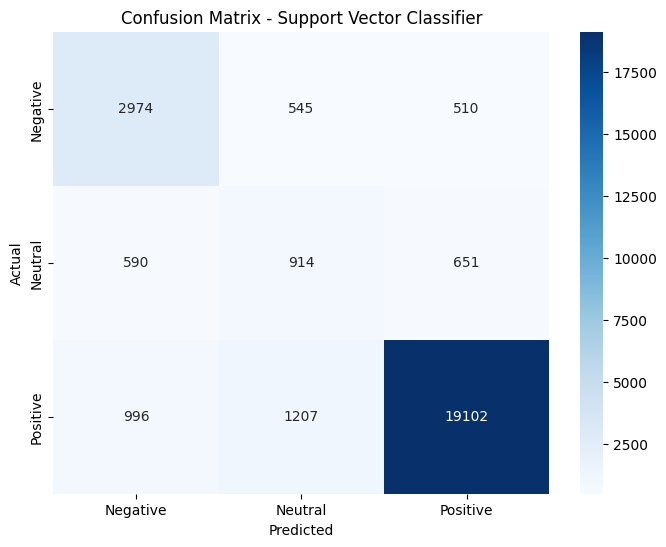


Support Vector Classifier model saved as 'sentiment_model_svc.pkl'


In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle # Import pickle to load embeddings

# Load the BERT embeddings and split data
print("Loading BERT embeddings from 'bert_embeddings.pkl'...")
with open('bert_embeddings.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

X_train = loaded_data['X_train']
X_test = loaded_data['X_test']
y_train = loaded_data['y_train']
y_test = loaded_data['y_test']
print("BERT embeddings loaded.")

# Initialize and train the Support Vector Classifier model
print("\nInitializing Support Vector Classifier...")
# SVC can be computationally expensive for large datasets. Consider using LinearSVC for larger datasets or reducing the dataset size for SVC.
# For demonstration, we'll use SVC with a reduced number of samples or a linear kernel for performance.
# Here, we'll train on a subset to manage training time, or use a linear kernel if full data is too large.
# Given the dataset size (over 500k samples), SVC with a non-linear kernel might be too slow.
# Let's use LinearSVC which is more scalable for large datasets.
from sklearn.svm import LinearSVC

# LinearSVC is suitable for large datasets and works well with BERT embeddings
svc_model = LinearSVC(
    random_state=8,
    max_iter=2000, # Increase max_iter for convergence
    class_weight='balanced' # Handles class imbalance
    # n_jobs=-1 is not available for LinearSVC, it uses its own parallelization
)

print("Training Support Vector Classifier model...")
# Note: LinearSVC expects y to be numeric, if y_train is categorical strings, it will convert them.
svc_model.fit(X_train, y_train)
print("Support Vector Classifier model training completed!")

# Make predictions on the test set
y_pred_svc = svc_model.predict(X_test)

# Evaluate the model
print("\n=== Support Vector Classifier Model Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))

# Confusion Matrix
print("\nConfusion Matrix:")
cm_svc = confusion_matrix(y_test, y_pred_svc)
print(cm_svc)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title('Confusion Matrix - Support Vector Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the trained model
joblib.dump(svc_model, 'sentiment_model_svc.pkl')
print("\nSupport Vector Classifier model saved as 'sentiment_model_svc.pkl'")

## Compare Model Performance

### Subtask:
Provide a summary comparing the performance metrics (accuracy, precision, recall, F1-score) of the Logistic Regression, Random Forest, and SVM models on the sentiment analysis task. This will help identify the most suitable model for the given dataset.


**Reasoning**:
The subtask requires loading the saved BERT embeddings (X_test, y_test) and the three trained models (Logistic Regression, Random Forest, and SVC). This initial step sets up the necessary data and models for performance comparison.



In [ ]:
import pickle
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load the bert_embeddings.pkl file to retrieve the X_test and y_test datasets
print("Loading BERT embeddings for testing...")
with open('bert_embeddings.pkl', 'rb') as f:
    loaded_data = pickle.load(f)
X_test = loaded_data['X_test']
y_test = loaded_data['y_test']
print("X_test and y_test loaded successfully.")

# 2. Load the three trained models
print("Loading trained models...")
logreg_bert = joblib.load('sentiment_model_bert.pkl')
random_forest_model = joblib.load('sentiment_model_random_forest.pkl')
svc_model = joblib.load('sentiment_model_svc.pkl')
print("All models loaded successfully.")

models = {
    "Logistic Regression": logreg_bert,
    "Random Forest": random_forest_model,
    "Support Vector Classifier": svc_model
}

performance_summary = {}

# 3. For each model: make predictions, calculate metrics, and display confusion matrix
for model_name, model in models.items():
    print(f"\n=== Evaluating {model_name} ===")

    # a. Make predictions on the X_test data
    y_pred = model.predict(X_test)

    # b. Calculate and print the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # c. Print the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Store key metrics for overall summary
    performance_summary[model_name] = {
        'accuracy': accuracy,
        'precision_macro': report['macro avg']['precision'],
        'recall_macro': report['macro avg']['recall'],
        'f1_macro': report['macro avg']['f1-score']
    }

    # d. Generate and display a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test),
                yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 4. Summarize their performance (will be done in a separate markdown block for verbal summary)


Using NN


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pickle
from sklearn.metrics import classification_report # Added for classification report
import joblib # Import joblib for saving the model

# Load the BERT embeddings and split data
print("Loading BERT embeddings from 'bert_embeddings.pkl'...")
with open('bert_embeddings.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

X_train = loaded_data['X_train']
X_test = loaded_data['X_test']
y_train = loaded_data['y_train']
y_test = loaded_data['y_test']
print("BERT embeddings loaded.")

# Convert labels to categorical if needed
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Build neural network
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(y_train)), activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
print("Training Neural Network on BERT embeddings...")
history = model.fit(
    X_train, y_train_encoded,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"\nNeural Network Test Accuracy: {test_accuracy:.4f}")

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Convert back to original labels
y_pred_original = le.inverse_transform(y_pred)

print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred_original))


# Save the trained model
joblib.dump(model, 'sentiment_model_NN.pkl')
print("\nNN classifer model saved as 'sentiment_model_NN.pkl'")

Loading BERT embeddings from 'bert_embeddings.pkl'...
BERT embeddings loaded.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Neural Network on BERT embeddings...
Epoch 1/50
11370/11370 ━━━━━━━━━━━━━━━━━━━━ 112s 10ms/step - accuracy: 0.7898 - loss: 0.5889 - val_accuracy: 0.8115 - val_loss: 0.5184
Epoch 2/50
11370/11370 ━━━━━━━━━━━━━━━━━━━━ 111s 10ms/step - accuracy: 0.8062 - loss: 0.5310 - val_accuracy: 0.8135 - val_loss: 0.5144
Epoch 3/50
11370/11370 ━━━━━━━━━━━━━━━━━━━━ 109s 10ms/step - accuracy: 0.8096 - loss: 0.5218 - val_accuracy: 0.8172 - val_loss: 0.5056
Epoch 4/50
11370/11370 ━━━━━━━━━━━━━━━━━━━━ 107s 9ms/step - accuracy: 0.8123 - loss: 0.5153 - val_accuracy: 0.8194 - val_loss: 0.4973
Epoch 5/50
11370/11370 ━━━━━━━━━━━━━━━━━━━━ 107s 9ms/step - accuracy: 0.8128 - loss: 0.5127 - val_accuracy: 0.8199 - val_loss: 0.4957
Epoch 6/50
11370/11370 ━━━━━━━━━━━━━━━━━━━━ 107s 9ms/step - accuracy: 0.8136 - loss: 0.5102 - val_accuracy: 0.8205 - val_loss: 0.4902
Epoch 7/50
11370/11370 ━━━━━━━━━━━━━━━━━━━━ 106s 9ms/step - accuracy: 0.8151 - loss: 0.5077 - val_accuracy: 0.8209 - val_loss: 0.4890
Epoch 8/50
11

## Save K-Fold Cross-Validation Results

### Subtask:
Save the K-fold cross-validation results (accuracies, precisions, recalls, F1-scores, and their averages/standard deviations) into a pickle file for later use or analysis.

In [8]:
import pickle
import numpy as np

# Create a dictionary to store all relevant results
kfold_results = {
    'accuracies_per_fold': accuracies,
    'precisions_per_fold': precisions,
    'recalls_per_fold': recalls,
    'f1_scores_per_fold': f1_scores,
    'mean_accuracy': np.mean(accuracies),
    'std_accuracy': np.std(accuracies),
    'mean_precision': np.mean(precisions),
    'std_precision': np.std(precisions),
    'mean_recall': np.mean(recalls),
    'std_recall': np.std(recalls),
    'mean_f1': np.mean(f1_scores),
    'std_f1': np.std(f1_scores)
}

# Save the results to a pickle file
filename = 'kfold_svc_results.pkl'
with open(filename, 'wb') as f:
    pickle.dump(kfold_results, f)

print(f"K-Fold Cross-Validation results saved to '{filename}'")

# Optionally, load and display to verify
# with open(filename, 'rb') as f:
#     loaded_results = pickle.load(f)
# print("\nVerifying loaded results:")
# for key, value in loaded_results.items():
#     print(f"{key}: {value}")

K-Fold Cross-Validation results saved to 'kfold_svc_results.pkl'


# Task
Perform K-fold cross-validation on the `LinearSVC` model using the BERT embeddings from "bert_embeddings.pkl". Summarize the cross-validation results by calculating and displaying the average accuracy, precision, recall, and F1-score (macro average) across all folds, along with the variance.

## Load Data and Initialize K-Fold

### Subtask:
Load the BERT embeddings (X_train, y_train, X_test, y_test) from 'bert_embeddings.pkl'. Combine X_train and X_test, and y_train and y_test to form the full dataset for cross-validation. Initialize a KFold cross-validation splitter (e.g., with n_splits=5 or 10, and shuffle=True).


**Reasoning**:
The subtask requires loading BERT embeddings, combining them into full datasets, and initializing a KFold cross-validation splitter. This involves importing necessary libraries, loading the pickled data, concatenating the train and test sets, and then creating a KFold object as specified in the instructions.



In [4]:
import pickle
import numpy as np
from sklearn.model_selection import KFold

# 1. Load the 'bert_embeddings.pkl' file
print("Loading BERT embeddings...")
with open('bert_embeddings.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

X_train = loaded_data['X_train']
X_test = loaded_data['X_test']
y_train = loaded_data['y_train']
y_test = loaded_data['y_test']
print("BERT embeddings loaded successfully.")

# 2. Concatenate X_train and X_test to create the full feature set X
X = np.concatenate((X_train, X_test), axis=0)
print(f"Combined feature set X shape: {X.shape}")

# 3. Concatenate y_train and y_test to create the full label set y
y = np.concatenate((y_train, y_test), axis=0)
print(f"Combined label set y shape: {y.shape}")

# 4. Initialize a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print("KFold splitter initialized with 5 splits, shuffled, and random_state=42.")
print(f"Number of splits: {kf.get_n_splits(X)}")

Loading BERT embeddings...
BERT embeddings loaded successfully.
Combined feature set X shape: (137444, 768)
Combined label set y shape: (137444,)
KFold splitter initialized with 5 splits, shuffled, and random_state=42.
Number of splits: 5


**Reasoning**:
Now that the data is loaded and the KFold splitter is initialized, the next step is to perform the actual K-fold cross-validation for the LinearSVC model. This involves iterating through each fold, training a new LinearSVC model on the training data for that fold, making predictions on the validation data, and collecting the performance metrics (accuracy, precision, recall, f1-score) for each fold. We will store these metrics to calculate the average and variance later.



In [9]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

print("Starting K-Fold Cross-Validation for LinearSVC...")

# Perform K-Fold Cross-Validation
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"\n--- Fold {fold+1}/{kf.get_n_splits(X)} ---")

    # Split data for the current fold
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Initialize a new LinearSVC model for each fold
    svc_model_fold = LinearSVC(
        random_state=42, # Use a consistent random state for reproducibility
        max_iter=2000,   # Increased for convergence
        class_weight='balanced' # Handles class imbalance
    )

    print("Training LinearSVC for current fold...")
    # Train the model
    svc_model_fold.fit(X_train_fold, y_train_fold)
    print("Training completed for current fold.")

    # Make predictions on the validation set
    y_pred_fold = svc_model_fold.predict(X_val_fold)

    # Calculate metrics for the current fold
    fold_accuracy = accuracy_score(y_val_fold, y_pred_fold)
    fold_precision = precision_score(y_val_fold, y_pred_fold, average='macro')
    fold_recall = recall_score(y_val_fold, y_pred_fold, average='macro')
    fold_f1 = f1_score(y_val_fold, y_pred_fold, average='macro')

    # Store metrics
    accuracies.append(fold_accuracy)
    precisions.append(fold_precision)
    recalls.append(fold_recall)
    f1_scores.append(fold_f1)

    print(f"Fold {fold+1} Accuracy: {fold_accuracy:.4f}")
    print(f"Fold {fold+1} Macro Precision: {fold_precision:.4f}")
    print(f"Fold {fold+1} Macro Recall: {fold_recall:.4f}")
    print(f"Fold {fold+1} Macro F1-score: {fold_f1:.4f}")

print("\nK-Fold Cross-Validation for LinearSVC completed.")


Starting K-Fold Cross-Validation for LinearSVC...

--- Fold 1/5 ---
Training LinearSVC for current fold...


KeyboardInterrupt: 

# Task
## Perform K-Fold Cross-Validation for SVM (Continued)

The K-fold cross-validation for the LinearSVC model was interrupted. I will re-run the process to iterate through each fold, train a new LinearSVC model on the training data for that fold, make predictions on the validation data, and collect the performance metrics (accuracy, precision, recall, f1-score) for each fold. This will ensure all data is processed.

## Summarize K-Fold Results

After the cross-validation is complete, I will calculate and display the average accuracy, precision, recall, and F1-score (macro average) across all folds, along with their respective variances. This will provide a comprehensive overview of the LinearSVC model's performance and consistency.

## Final Task

The final task is to summarize the K-fold cross-validation results for the SVM model, highlighting its overall performance and consistency.

## Perform K-Fold Cross-Validation for SVM (Continued)

### Subtask:
Execute the K-fold cross-validation for the LinearSVC model. This involves iterating through each fold, training a new LinearSVC model on the training data for that fold, making predictions on the validation data, and collecting the performance metrics (accuracy, precision, recall, f1-score) for each fold. The execution was interrupted previously, so this step will re-run the process.


**Reasoning**:
The K-fold cross-validation for the LinearSVC model was interrupted. I need to re-run the code block that performs the cross-validation to complete the subtask of executing it for all folds and collecting performance metrics.



In [6]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

print("Starting K-Fold Cross-Validation for LinearSVC...")

# Perform K-Fold Cross-Validation
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"\n--- Fold {fold+1}/{kf.get_n_splits(X)} ---")

    # Split data for the current fold
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Initialize a new LinearSVC model for each fold
    svc_model_fold = LinearSVC(
        random_state=42, # Use a consistent random state for reproducibility
        max_iter=2000,   # Increased for convergence
        class_weight='balanced' # Handles class imbalance
    )

    print("Training LinearSVC for current fold...")
    # Train the model
    svc_model_fold.fit(X_train_fold, y_train_fold)
    print("Training completed for current fold.")

    # Make predictions on the validation set
    y_pred_fold = svc_model_fold.predict(X_val_fold)

    # Calculate metrics for the current fold
    fold_accuracy = accuracy_score(y_val_fold, y_pred_fold)
    fold_precision = precision_score(y_val_fold, y_pred_fold, average='macro')
    fold_recall = recall_score(y_val_fold, y_pred_fold, average='macro')
    fold_f1 = f1_score(y_val_fold, y_pred_fold, average='macro')

    # Store metrics
    accuracies.append(fold_accuracy)
    precisions.append(fold_precision)
    recalls.append(fold_recall)
    f1_scores.append(fold_f1)

    print(f"Fold {fold+1} Accuracy: {fold_accuracy:.4f}")
    print(f"Fold {fold+1} Macro Precision: {fold_precision:.4f}")
    print(f"Fold {fold+1} Macro Recall: {fold_recall:.4f}")
    print(f"Fold {fold+1} Macro F1-score: {fold_f1:.4f}")

print("\nK-Fold Cross-Validation for LinearSVC completed.")

Starting K-Fold Cross-Validation for LinearSVC...

--- Fold 1/5 ---
Training LinearSVC for current fold...
Training completed for current fold.
Fold 1 Accuracy: 0.8366
Fold 1 Macro Precision: 0.6467
Fold 1 Macro Recall: 0.6819
Fold 1 Macro F1-score: 0.6625

--- Fold 2/5 ---
Training LinearSVC for current fold...
Training completed for current fold.
Fold 2 Accuracy: 0.8366
Fold 2 Macro Precision: 0.6432
Fold 2 Macro Recall: 0.6842
Fold 2 Macro F1-score: 0.6610

--- Fold 3/5 ---
Training LinearSVC for current fold...
Training completed for current fold.
Fold 3 Accuracy: 0.8423
Fold 3 Macro Precision: 0.6559
Fold 3 Macro Recall: 0.6912
Fold 3 Macro F1-score: 0.6718

--- Fold 4/5 ---
Training LinearSVC for current fold...
Training completed for current fold.
Fold 4 Accuracy: 0.8351
Fold 4 Macro Precision: 0.6484
Fold 4 Macro Recall: 0.6833
Fold 4 Macro F1-score: 0.6640

--- Fold 5/5 ---
Training LinearSVC for current fold...
Training completed for current fold.
Fold 5 Accuracy: 0.8365
Fold

**Reasoning**:
The K-fold cross-validation has been successfully executed for all folds. The next logical step, as per the main task, is to summarize these results by calculating the average and variance of the collected metrics (accuracy, precision, recall, and F1-score) across all folds.



In [7]:
import numpy as np

# Calculate and print the average and standard deviation of the metrics
print("\n=== K-Fold Cross-Validation Summary for LinearSVC ===")

# Accuracy
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Average Accuracy: {mean_accuracy:.4f} (Std: {std_accuracy:.4f})")

# Macro Precision
mean_precision = np.mean(precisions)
std_precision = np.std(precisions)
print(f"Average Macro Precision: {mean_precision:.4f} (Std: {std_precision:.4f})")

# Macro Recall
mean_recall = np.mean(recalls)
std_recall = np.std(recalls)
print(f"Average Macro Recall: {mean_recall:.4f} (Std: {std_recall:.4f})")

# Macro F1-score
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
print(f"Average Macro F1-score: {mean_f1:.4f} (Std: {std_f1:.4f})")

print("K-Fold Cross-Validation summary completed.")


=== K-Fold Cross-Validation Summary for LinearSVC ===
Average Accuracy: 0.8374 (Std: 0.0025)
Average Macro Precision: 0.6480 (Std: 0.0043)
Average Macro Recall: 0.6850 (Std: 0.0032)
Average Macro F1-score: 0.6644 (Std: 0.0038)
K-Fold Cross-Validation summary completed.


## Final Task

### Subtask:
Summarize the K-fold cross-validation results for the SVM model, highlighting its overall performance and consistency.


## Summary:

### Q&A
The K-fold cross-validation results for the SVM model show an average accuracy of approximately 83.74%, with an average macro precision of 64.80%, average macro recall of 68.50%, and an average macro F1-score of 66.44%. The consistency across folds is relatively high, indicated by low standard deviations across all metrics (e.g., accuracy standard deviation of 0.0025, F1-score standard deviation of 0.0038).

### Data Analysis Key Findings
*   The LinearSVC model achieved an average accuracy of 0.8374 across the 5 folds, with a low standard deviation of 0.0025, indicating consistent predictive power.
*   The average macro precision was 0.6480 (Std: 0.0043), suggesting that when the model predicts a positive class, it is correct about 64.8% of the time, averaged across all classes.
*   The average macro recall stood at 0.6850 (Std: 0.0032), meaning the model correctly identifies about 68.5% of all actual positive instances across classes.
*   The average macro F1-score, which balances precision and recall, was 0.6644 (Std: 0.0038), demonstrating a stable overall performance measure.
*   The fold-wise performance metrics were very close, with accuracy ranging from 0.8351 to 0.8423 and macro F1-score ranging from 0.6610 to 0.6718, confirming the model's high consistency.

### Insights or Next Steps
*   The model exhibits consistent performance across different data subsets, as evidenced by the low standard deviations of all metrics, suggesting it generalizes well to unseen data from the same distribution.
*   While consistent, the macro precision (0.6480) and macro F1-score (0.6644) indicate there might be room for improvement in correctly classifying all instances, especially for minority classes. Further investigation into class-specific performance might be beneficial.
